<h2 style="text-align: center;">Project Title</h2>

<h2 style="text-align: center;">telco-customer-churn</h2>

<h2 style="text-align: center;">Team Information</h2>



| Section Number | Name              | Student ID  |
|----------------|-------------------|-------------|
| 04             | Mohammed Alayid   | 202272380   |
| 04             | NAWAF ALJOHANI     | 202282380   |
| 04             | Ibrahim Alobaid   | 202253180   |
| 04             | Ali AlSubaie      | 202249580   |



# Phase 1
Discovery


### Hypothesis 

Previously, our intuition led us to hypothesize that **customers who have a shorter tenure and higher monthly charges are more likely to churn.** This initial hypothesis was based on a logical assumption that newer customers with higher financial commitments might be more inclined to cancel their service.

However, after analyzing the data, we discovered that other factors play a more significant role. The data reveals that **customers who have a shorter tenure, are on a month-to-month contract, and use fiber optic internet are more likely to cancel the service compared to other customer groups.**

This shift from an intuition-based approach to a data-driven hypothesis demonstrates the importance of analyzing actual evidence to uncover the true factors influencing customer behavior.


About the dataset
Problem Description:
The problem is to predict customer churn based on various customer attributes such as gender, senior citizen status, partner status, dependents, tenure, services subscribed to, payment method, monthly charges, and total charges.

Objectives of the project:
1. To identify key factors that contribute to customer churn in the telecommunications industry.
2. To build a predictive model that can accurately predict customer churn based on the available customer data.
3. To provide insights and recommendations to reduce customer churn and improve customer retention strategies.



Dataset Description:
The dataset contains information about customers in a telecommunications company, including attributes such as customer ID, gender, senior citizen status, partner status, dependents, tenure, phone service, internet service, payment method, monthly charges, total charges, and churn status.

# Description of Telco Customer Churn Dataset Columns

The dataset contains the following columns:

1. **customerID**: A unique identifier for each customer.
2. **gender**: The customer's gender (male or female).
3. **SeniorCitizen**: Indicates if the customer is a senior citizen (1 if the customer is 65 years or older, 0 if younger).
4. **Partner**: Indicates if the customer has a partner (Yes or No).
5. **Dependents**: Indicates if the customer has dependents (Yes or No).
6. **tenure**: The number of months the customer has been with the company.
7. **PhoneService**: Indicates if the customer has a phone service (Yes or No).
8. **MultipleLines**: Indicates if the customer has multiple lines (Yes or No).
9. **InternetService**: The type of internet service the customer has subscribed to (DSL, Fiber optic, None).
10. **OnlineSecurity**: Indicates if the customer has online security service (Yes or No).
11. **OnlineBackup**: Indicates if the customer has online backup service (Yes or No).
12. **DeviceProtection**: Indicates if the customer has device protection service (Yes or No).
13. **TechSupport**: Indicates if the customer has tech support service (Yes or No).
14. **StreamingTV**: Indicates if the customer has streaming TV service (Yes or No).
15. **StreamingMovies**: Indicates if the customer has streaming movies service (Yes or No).
16. **Contract**: The type of contract the customer has (Month-to-month, One year, Two year).
17. **PaperlessBilling**: Indicates if the customer prefers paperless billing (Yes or No).
18. **PaymentMethod**: The method of payment used by the customer (Credit card, Bank transfer, Electronic check, Mailed check).
19. **MonthlyCharges**: The amount charged to the customer monthly.
20. **TotalCharges**: The total amount charged to the customer to date.
21. **Churn**: Indicates if the customer has left the service within the last month (Yes or No).

These columns provide a comprehensive view of customer behavior and account details, helping to analyze the factors leading to customer churn and develop strategies for retention.


# Phase 2
Data preperation

In [151]:
import pandas as pd
import numpy as np
import random
# Creating a  dataframe 
df = pd.read_csv("dataset.csv")
display(df.head(5))

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [152]:
#Creat null values in PaymentMethod catigorial column and MonthlyCharges numarical column
# Set a random seed for reproducibility
np.random.seed(30)

# Define the proportion of values to replace with empty values
proportion_to_replace = 0.05  # Replace 5% of the values

# Calculate how many values to replace
num_values_to_replace = int(len(df) * proportion_to_replace)

# Get random indices to replace
random_indices = np.random.choice(df.index, num_values_to_replace, replace=False)

# Replace the selected indices in PaymentMethod and MonthlyCharges with NaN
df.loc[random_indices, 'PaymentMethod'] = np.nan
df.loc[random_indices, 'MonthlyCharges'] = np.nan


In [153]:
display(df)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [154]:
display(df[["PaymentMethod"]])
display(df[["MonthlyCharges"]])

PaymentMethod
0              Electronic check
1                  Mailed check
2                  Mailed check
3     Bank transfer (automatic)
4              Electronic check
...                         ...
7038               Mailed check
7039    Credit card (automatic)
7040           Electronic check
7041               Mailed check
7042  Bank transfer (automatic)

[7043 rows x 1 columns]

MonthlyCharges
0              29.85
1              56.95
2              53.85
3              42.30
4              70.70
...              ...
7038           84.80
7039          103.20
7040           29.60
7041           74.40
7042          105.65

[7043 rows x 1 columns]

In [155]:
#So, We decided to remove the customers with this issue as it affects the data.
rows_with_empty_Total=df.loc[df['TotalCharges']==' ',:].index
df=df.drop(rows_with_empty_Total,axis=0)
#create an inconsistency in total charge column
def commas(x):
    x1=float(x)
    x2=int(x1)
    decimalPart=x1-x2
    x2=str(x2)
    finalstr=[]
    length=len(x2)
    for i in range(length):
        if (length - i) % 3 == 0 and i != 0:  #Check if the current position i is at a multiple of 3 from the
                                              #right (except at the start ,xxx.00).
            finalstr.append(",")
        finalstr.append(x2[i])
    final="".join(finalstr)
    final=final+'.'+str(round(decimalPart,4)).replace('0.','')
    return str(final) 
#some elements do not need commas (e.g., 345) and may return as numbers in the DataFrame, causing issues when
#using the replace function. Therefore, we need to use str() to ensure this problem is resolved.
df["TotalCharges"]=df['TotalCharges'].apply(commas)
display(df[['TotalCharges']])
print('Type : ',df['TotalCharges'].dtype)

TotalCharges
0           29.85
1         1,889.5
2          108.15
3        1,840.75
4          151.65
...           ...
7038      1,990.5
7039      7,362.9
7040       346.45
7041        306.6
7042      6,844.5

[7032 rows x 1 columns]

Type :  object


<h2 style="text-align: center;">Data Types</h2>

| Feature           | Type              | Data Type  |
|-------------------|-------------------|------------|
| CustomerID        | Auxiliary         | Categorical|
| gender            | Auxiliary         | Categorical|
| SeniorCitizen     | Auxiliary         | Nominal    |
| Partner           | Auxiliary       | Nominal    |
| Dependent         | Independent       | Nominal    |
| tenure            | Independent       | Numeric    |
| PhoneService      | Auxiliary         | Nominal    |
| MultipleLines     | Auxiliary         | Nominal    |
| InternetService   | Independent       | Categorical|
| OnlineSecurity    | Independent       | Nominal    |
| TechSupport       | Independent       | Nominal    |
| StreamingTV       | Auxiliary       | Nominal    |
| StreamingMovies   | Auxiliary       | Nominal    |
| Contract          | Independent       | Categorical|
| PaperlessBilling  | Independent       | Nominal    |
| PaymentMethod     | Independent       | Categorical|
| MonthlyCharges    | Independent       | Numeric    |
| TotalCharges      | Independent       | Numeric    |
| Churn             | Dependent         | Nominal    |


In [157]:
# to the number of non null values
df.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       6680
MonthlyCharges      6680
TotalCharges        7032
Churn               7032
dtype: int64

In [158]:
#to see the number of null values missing data 
df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod       352
MonthlyCharges      352
TotalCharges          0
Churn                 0
dtype: int64

In [159]:
#There are missing values in TotalCharges, MonthlyCharges, and PaymentMethod.

In [160]:
# obtain information to identify inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [161]:
#There is inconsistency in TotalCharges because of the "," it is considered as a categorical rather than numarical.   

In [162]:
#to understand the data for numaric

df.describe().T

count         mean          std    min     25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.00     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.00    29.000   
MonthlyCharges  6680.0    64.711445    30.087729  18.25   35.45    70.300   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8500   118.75  
TotalCharges    3794.7375  8684.80

In [163]:
#to understand the data for categorical
df.describe(include="object").T

count unique               top  freq
customerID        7032   7032        7590-VHVEG     1
gender            7032      2              Male  3549
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     6680      4  Electronic check  2248
Churn             7032      2                No  5163

In [164]:
# Function to generate random outliers
def add_outliers(value):
    if np.random.rand() < 0.1:  # 10% chance of creating an outlier
        return value * np.random.uniform(5, 10)  # Multiply the value by a random factor between 5 and 10
    else:
        return value

# Apply the function to create outliers in the 'tenure' and 'MonthlyCharges' columns
df['tenure'] = df['tenure'].apply(add_outliers)
df['MonthlyCharges'] = df['MonthlyCharges'].apply(add_outliers)

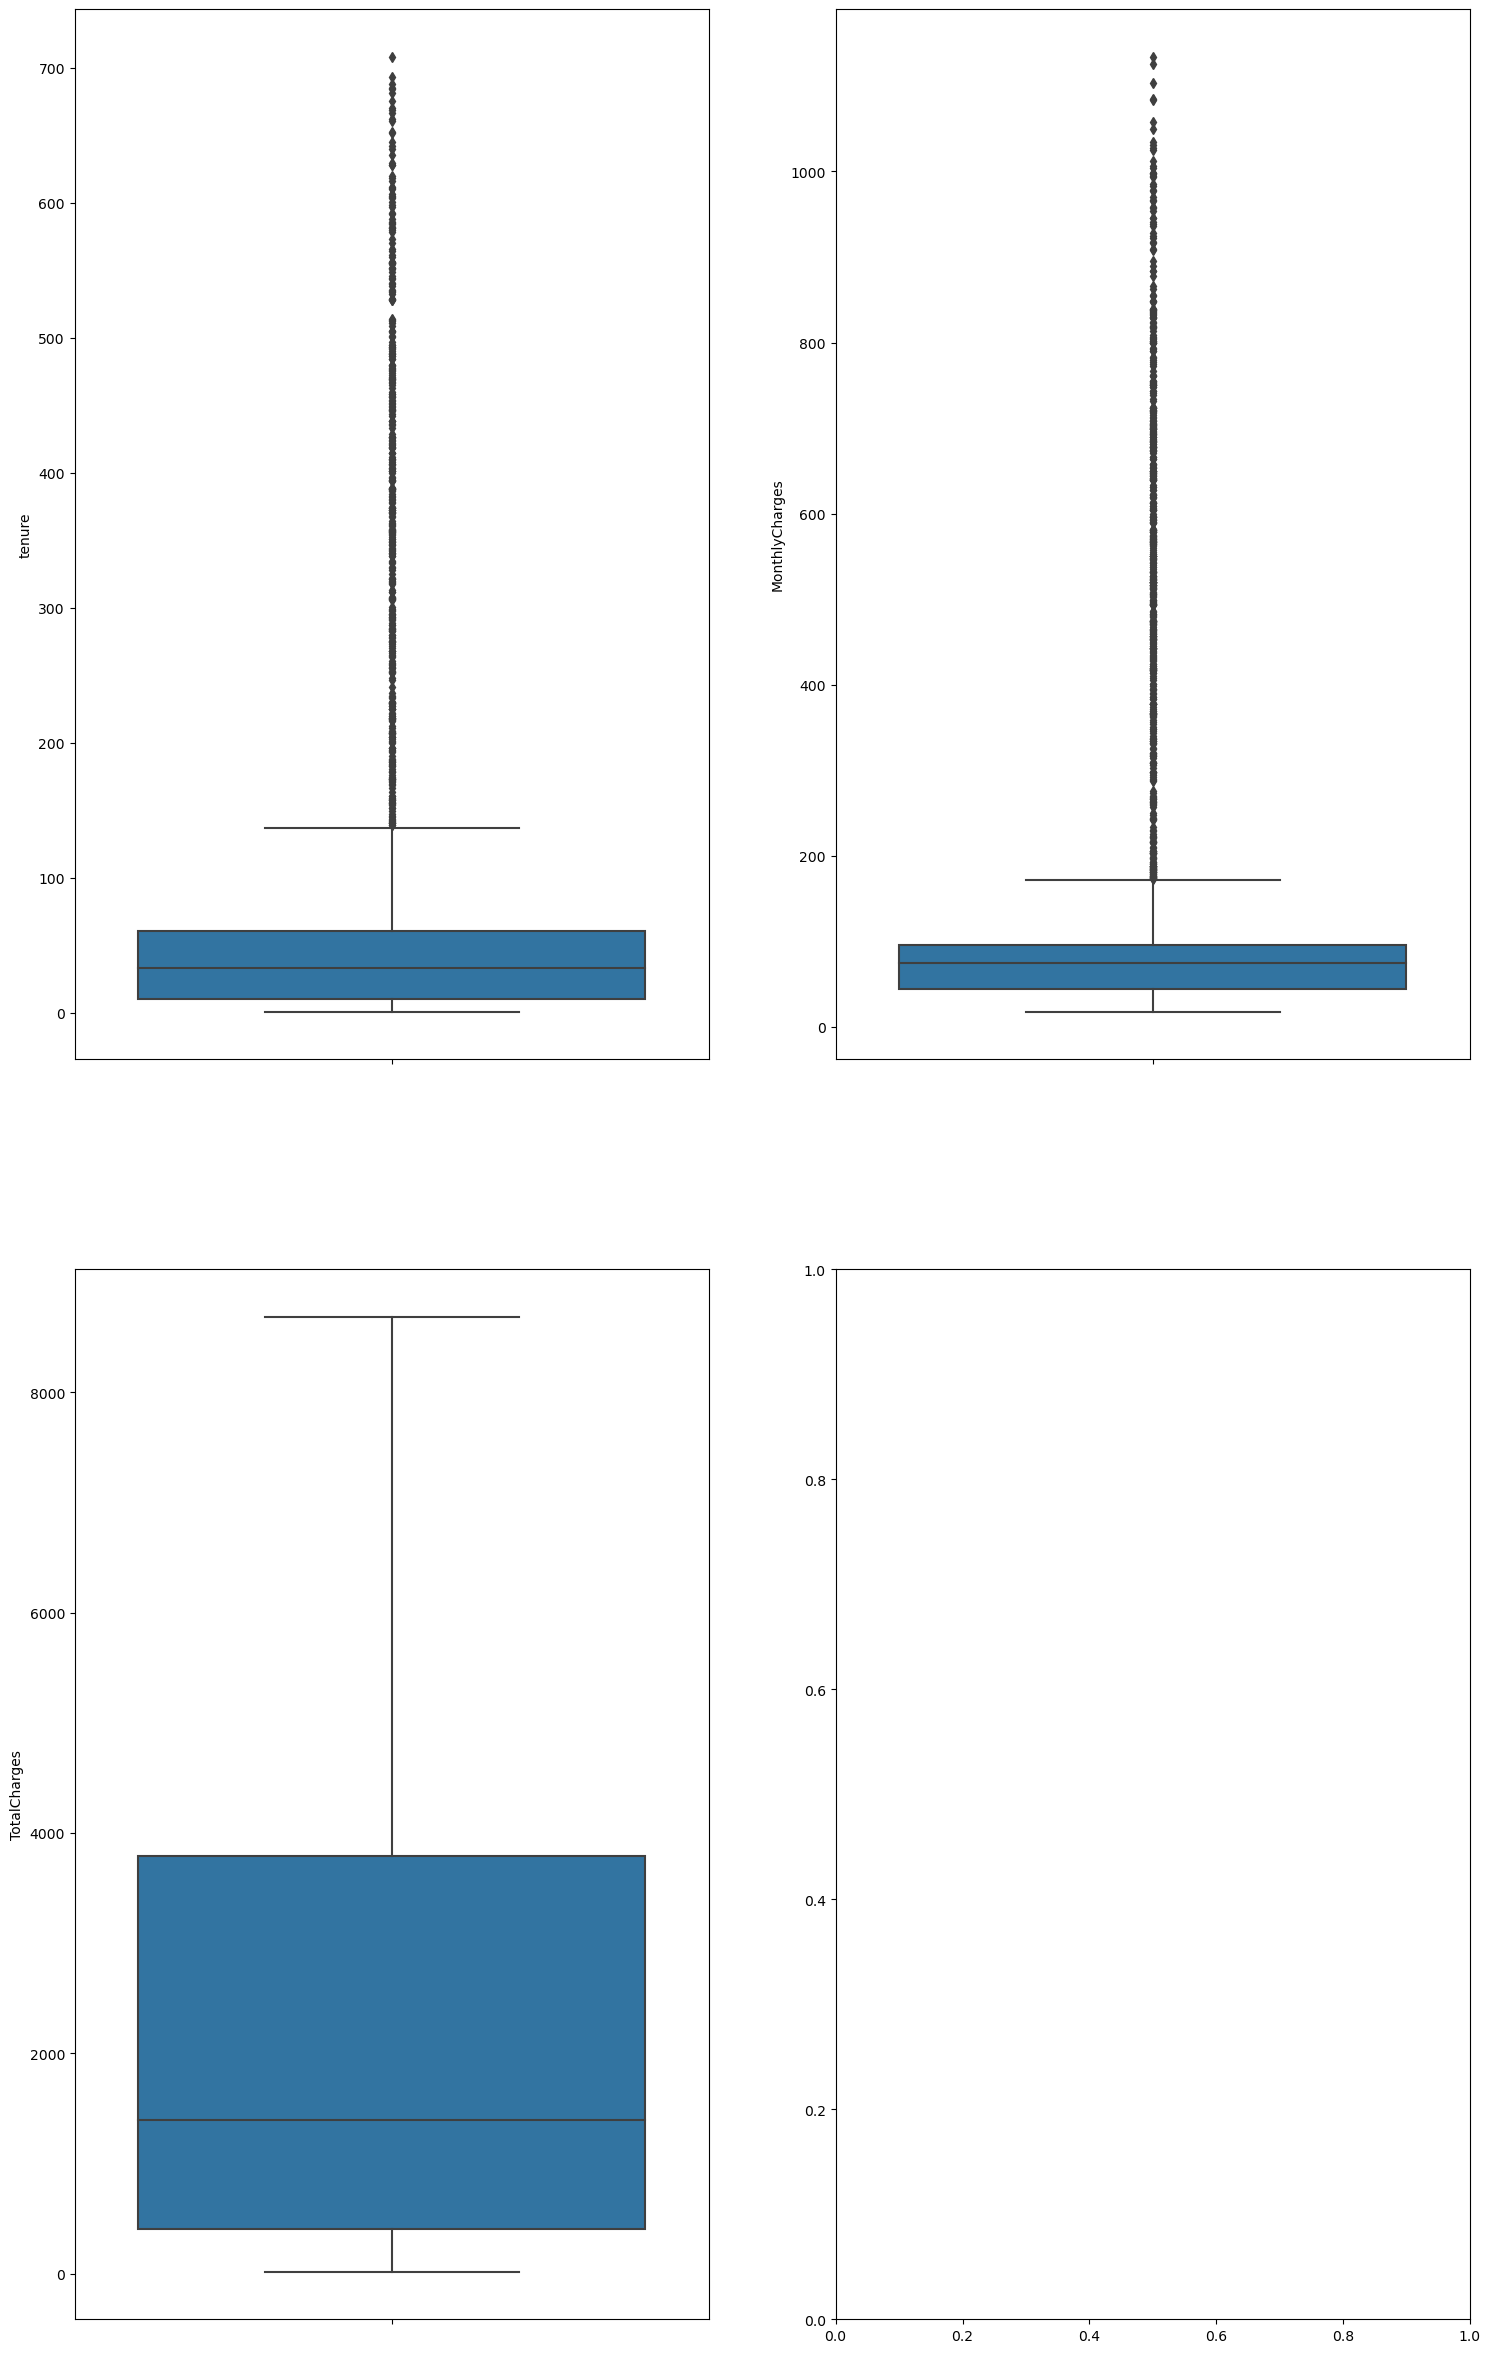

In [165]:
#boxplots to identify outliers by graphing
import seaborn as sns
import matplotlib.pyplot as plt
num_columns=df.select_dtypes(exclude="object").columns
fig, axes = plt.subplots(2,2, figsize=(18, 30))
i=0
for c in num_columns:
        if c != "SeniorCitizen" :
            # Create boxplots to identify the inconsistency
            sns.boxplot(y=c, data=df,ax=axes.flatten()[i])
            i=i+1
plt.show()

In [166]:
#identify the outliers 
numaric_columns=df.select_dtypes(exclude="object").columns

for i in numaric_columns:
    if i != "SeniorCitizen":
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count_iqr = df[(df[i] < lower_bound) | (df[i] > upper_bound)].shape[0]

        # Display the result
        print("Number of outliers in", i ,"=",outlier_count_iqr)


Number of outliers in tenure = 417
Number of outliers in MonthlyCharges = 567
Number of outliers in TotalCharges = 0


# fixing the inconsistencies and noise and imputing the rows with missing values

In [156]:
## fixing inconsistencies
df.columns=df.columns.str.strip()
df['TotalCharges']=df['TotalCharges'].apply(lambda x: float(x.replace(",", "")))
print(df['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64


In [167]:
null_colomns=df.columns[df.isna().any()]
for c in null_colomns:
    if df[c].dtype!="object":
        value=df[c].mean()
    else:
        value=df[c].mode()
        value=value[0]
    df[c].fillna(value,inplace=True)
display((df))

customerID  gender  SeniorCitizen Partner Dependents      tenure  \
0     7590-VHVEG  Female              0     Yes         No    1.000000   
1     5575-GNVDE    Male              0      No         No   34.000000   
2     3668-QPYBK    Male              0      No         No   12.061694   
3     7795-CFOCW    Male              0      No         No  346.512845   
4     9237-HQITU  Female              0      No         No    2.000000   
...          ...     ...            ...     ...        ...         ...   
7038  6840-RESVB    Male              0     Yes        Yes   24.000000   
7039  2234-XADUH  Female              0     Yes        Yes   72.000000   
7040  4801-JZAZL  Female              0     Yes        Yes   11.000000   
7041  8361-LTMKD    Male              1     Yes         No    4.000000   
7042  3186-AJIEK    Male              0      No         No   66.000000   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check      29.850000         29.85   
1                  No               Mailed check      56.950000       1889.50   
2                 Yes               Mailed check      53.850000        108.15   
3                  No  Bank transfer (automatic)     395.019517       1840.75   
4                 Yes           Electronic check      70.700000        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check      84.800000       1990.50   
7039              Yes    Credit card (automatic)     103.200000       7362.90   
7040              Yes           Electronic check      29.600000        346.45   
7041              Yes               Mailed check      74.400000        306.60   
7042              Yes  Bank transfer (automatic)     105.650000       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

In [168]:
mapp={0:"No",1:"Yes"}
df["SeniorCitizen"]=df["SeniorCitizen"].map(mapp)
df[["SeniorCitizen"]]

SeniorCitizen
0               No
1               No
2               No
3               No
4               No
...            ...
7038            No
7039            No
7040            No
7041           Yes
7042            No

[7032 rows x 1 columns]

In [169]:
#remove outliers without ecceeding 1500 rows.
selected_rows = df[(df['MonthlyCharges'] < 55.15-25) | (df['MonthlyCharges'] > 78.66+25)].index
print(selected_rows.shape[0])
df.drop(selected_rows,inplace=True)
selected_rows = df[(df['tenure'] < 55.15-25) | (df['tenure'] > 78.66+25)].index
print(selected_rows.shape[0])
df.drop(selected_rows,inplace=True)
df.info()

2994
2336
<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 1 to 7039
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1702 non-null   object 
 1   gender            1702 non-null   object 
 2   SeniorCitizen     1702 non-null   object 
 3   Partner           1702 non-null   object 
 4   Dependents        1702 non-null   object 
 5   tenure            1702 non-null   float64
 6   PhoneService      1702 non-null   object 
 7   MultipleLines     1702 non-null   object 
 8   InternetService   1702 non-null   object 
 9   OnlineSecurity    1702 non-null   object 
 10  OnlineBackup      1702 non-null   object 
 11  DeviceProtection  1702 non-null   object 
 12  TechSupport       1702 non-null   object 
 13  StreamingTV       1702 non-null   object 
 14  StreamingMovies   1702 non-null   object 
 15  Contract          1702 non-null   object 
 16  PaperlessBilling  1702 non-null   obj

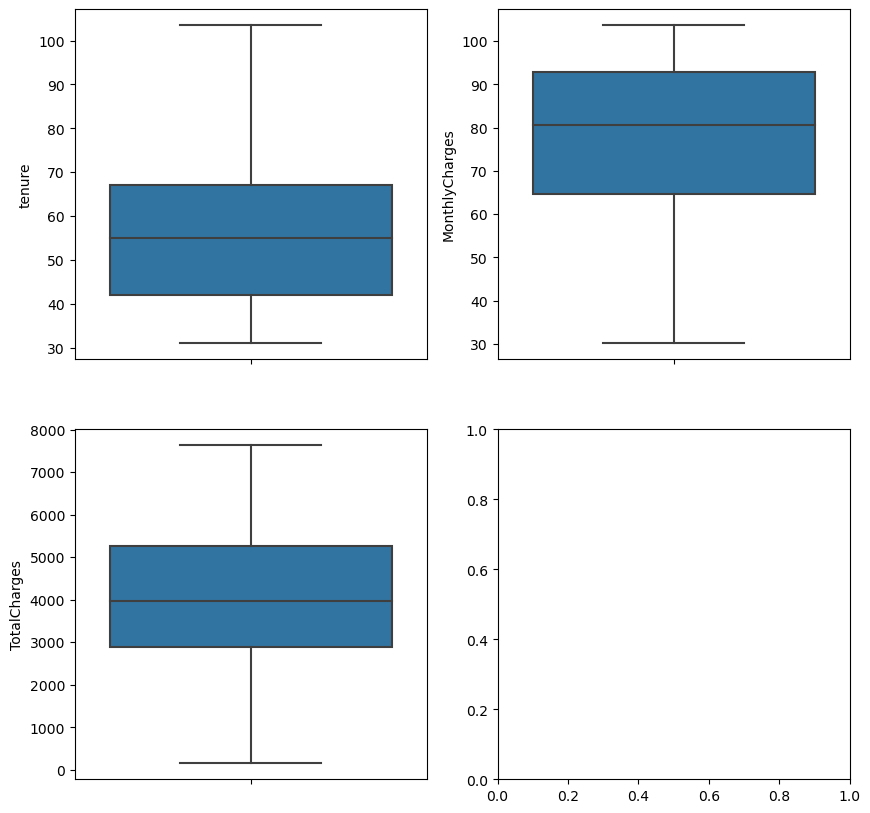

In [170]:
#boxplots after removing the outliers
import seaborn as sns
import matplotlib.pyplot as plt
num_columns=df.select_dtypes(exclude="object").columns
fig,axes = plt.subplots(2, 2, figsize=(10,10))
i=0
for c in num_columns:
        if c != "SeniorCitizen":
            # Create boxplots to identify the inconsistency
            sns.boxplot(y=c, data=df,ax=axes.flatten()[i])
            i=1+i
plt.show()

# Phase 3:
Model Planning

In [171]:
# the statistical summaries numaric

df.describe().T

count         mean          std     min        25%       50%  \
tenure          1702.0    54.179207    13.826280   31.00    42.0000    55.000   
MonthlyCharges  1702.0    77.594418    17.880919   30.15    64.7500    80.575   
TotalCharges    1702.0  4021.717979  1608.060494  151.30  2893.6875  3975.800   

                      75%          max  
tenure            67.0000   103.502773  
MonthlyCharges    92.9375   103.650000  
TotalCharges    5264.2875  7634.800000

In [172]:
## the statistical summaries categorical

df.describe(include=("object")).T

count unique               top  freq
customerID        1702   1702        5575-GNVDE     1
gender            1702      2              Male   869
SeniorCitizen     1702      2                No  1377
Partner           1702      2               Yes  1069
Dependents        1702      2                No  1140
PhoneService      1702      2               Yes  1474
MultipleLines     1702      3               Yes   922
InternetService   1702      2               DSL   914
OnlineSecurity    1702      2                No   864
OnlineBackup      1702      2               Yes   945
DeviceProtection  1702      2               Yes   923
TechSupport       1702      2                No   915
StreamingTV       1702      2               Yes   925
StreamingMovies   1702      2               Yes   916
Contract          1702      3    Month-to-month   617
PaperlessBilling  1702      2               Yes  1077
PaymentMethod     1702      4  Electronic check   529
Churn             1702      2                No  1423

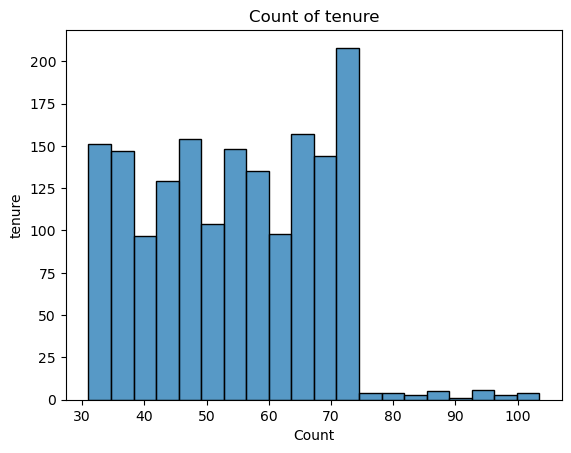

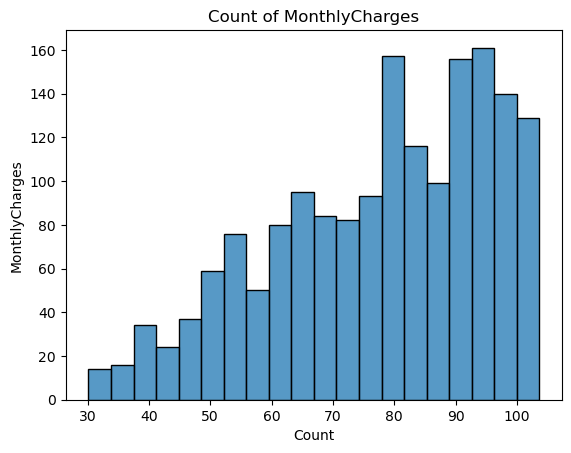

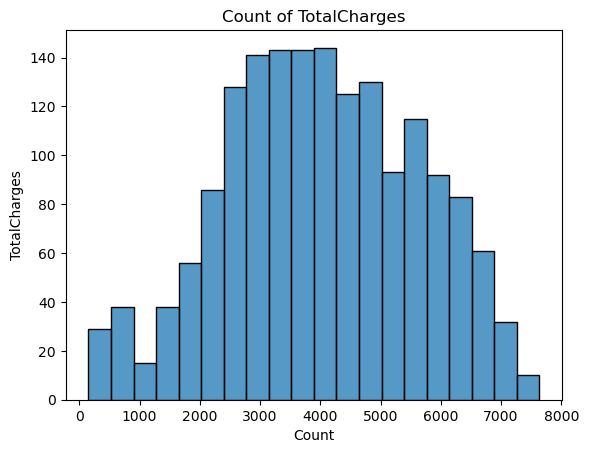

In [173]:
#,Making univariate graphs based on single variable for numaric columns
obj_columns=df.select_dtypes(exclude="object").columns
for i in obj_columns:
    if i != 'customerID':  # Exclude the 'id' column
        plt.figure()
        sns.histplot(x=i,bins=20, data=df)
        plt.title(f'Count of {i}')
        plt.xlabel('Count')
        plt.ylabel(i)
        plt.show()

Univariate graphs based on single variable for numaric columns


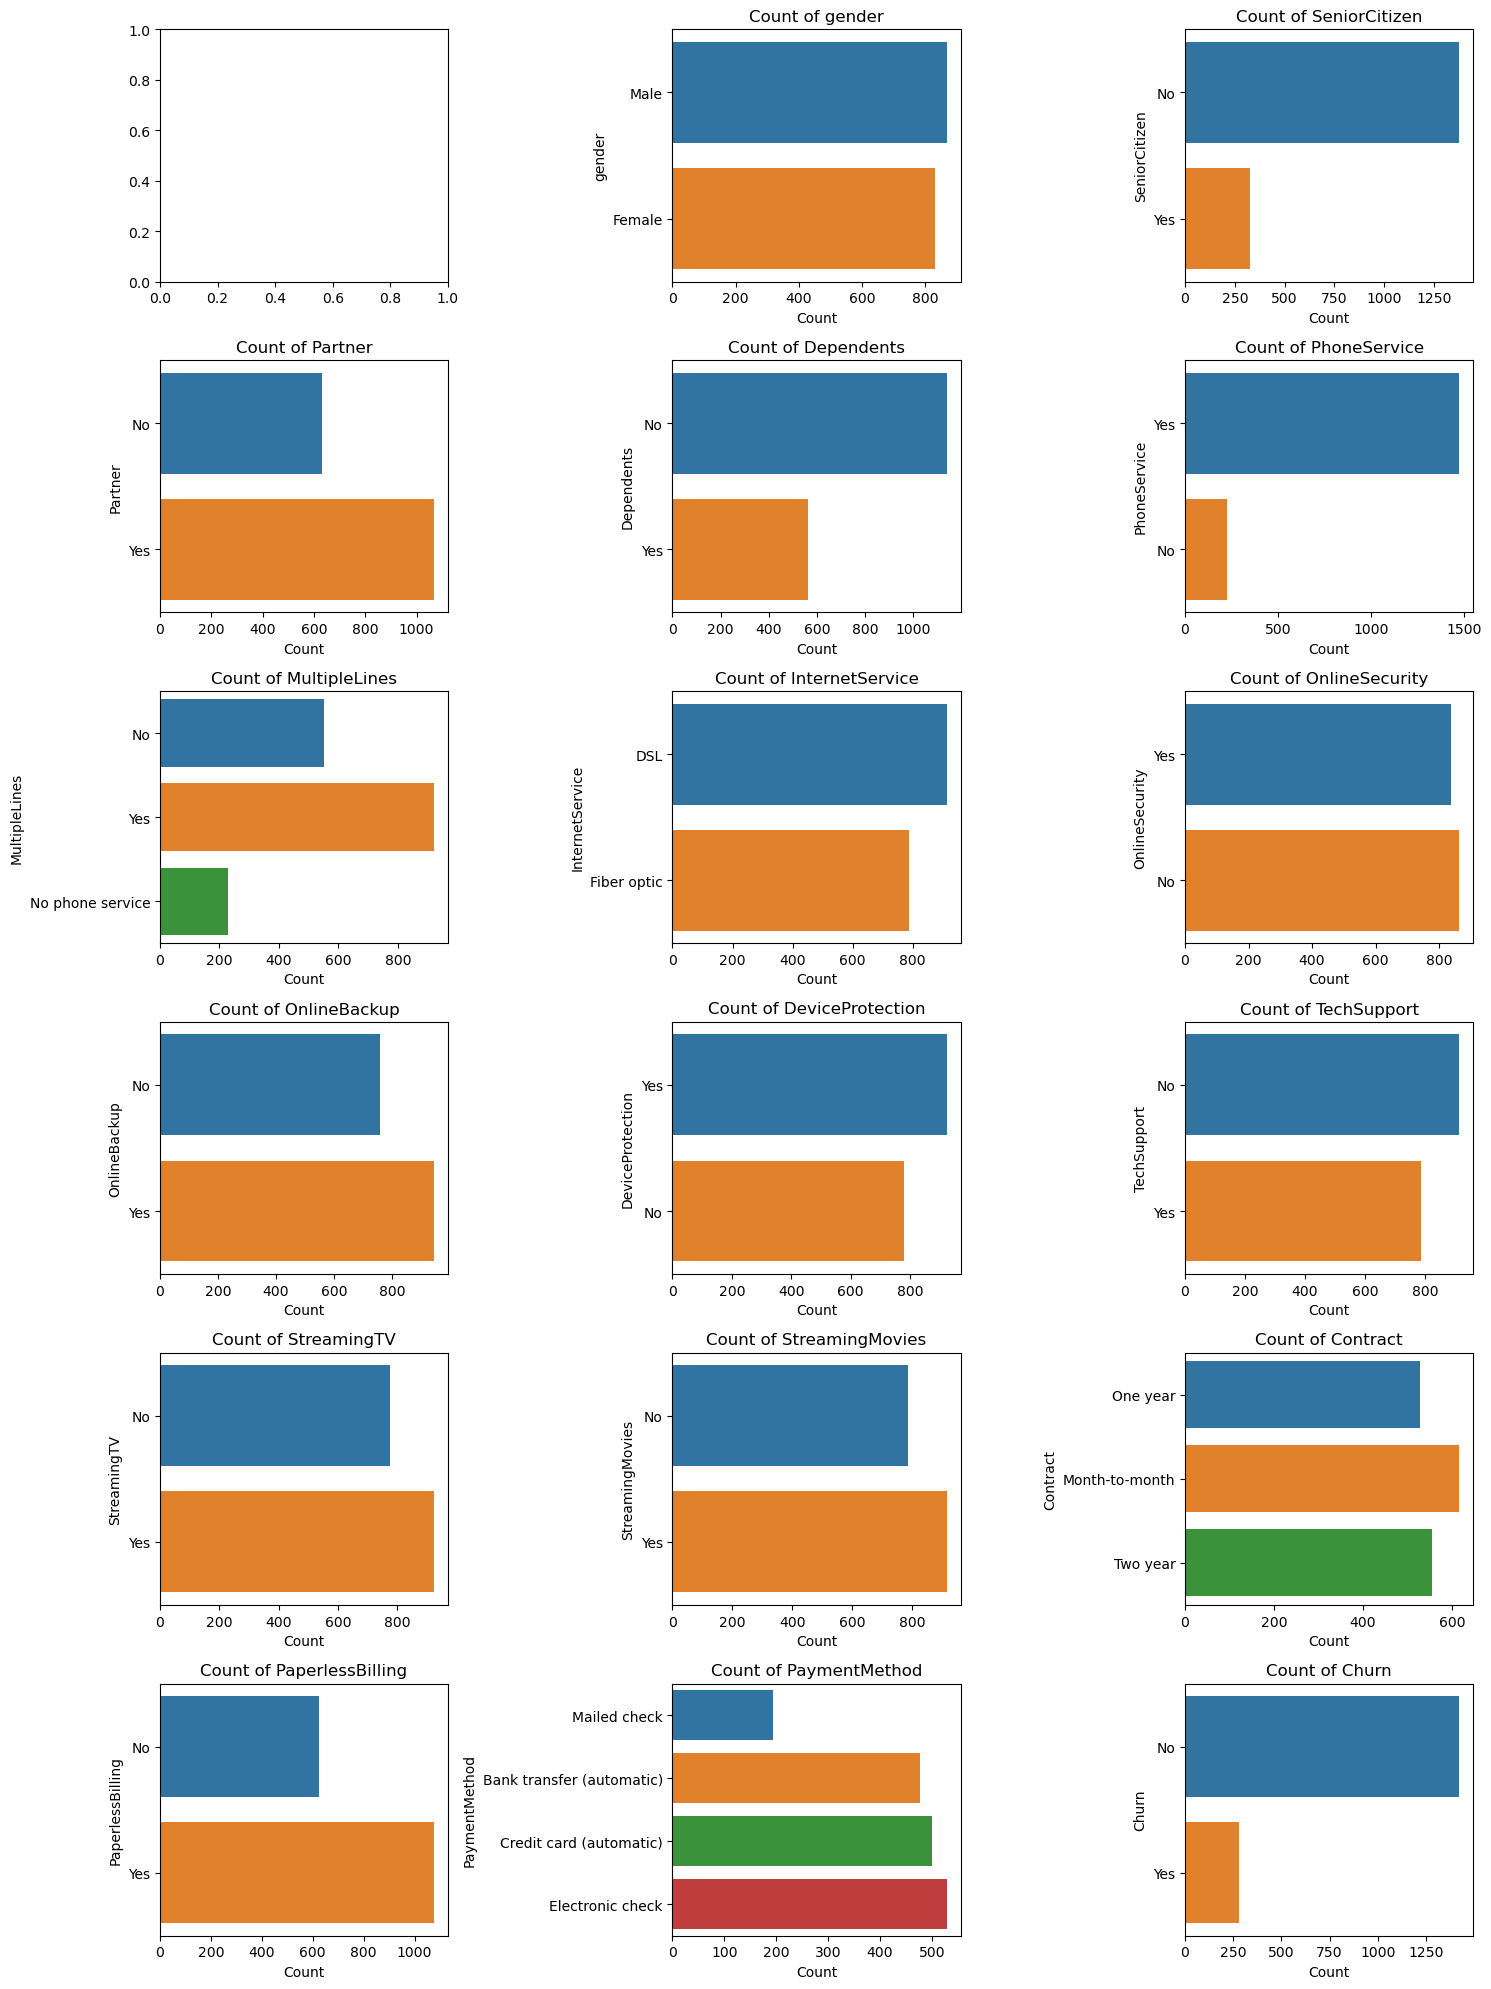

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select object type columns
obj_columns = df.select_dtypes("object").columns

# Create a figure with subplots
fig, axes = plt.subplots(6, 3, figsize=(15, 20))  # Adjust the grid size and figure size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through object columns and plot on subplots
for i, col in enumerate(obj_columns):
    if col != 'customerID':  # Exclude the 'customerID' column
        sns.countplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Count of {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(len(obj_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Univariate graphs based on single variable for Non numaric columns


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

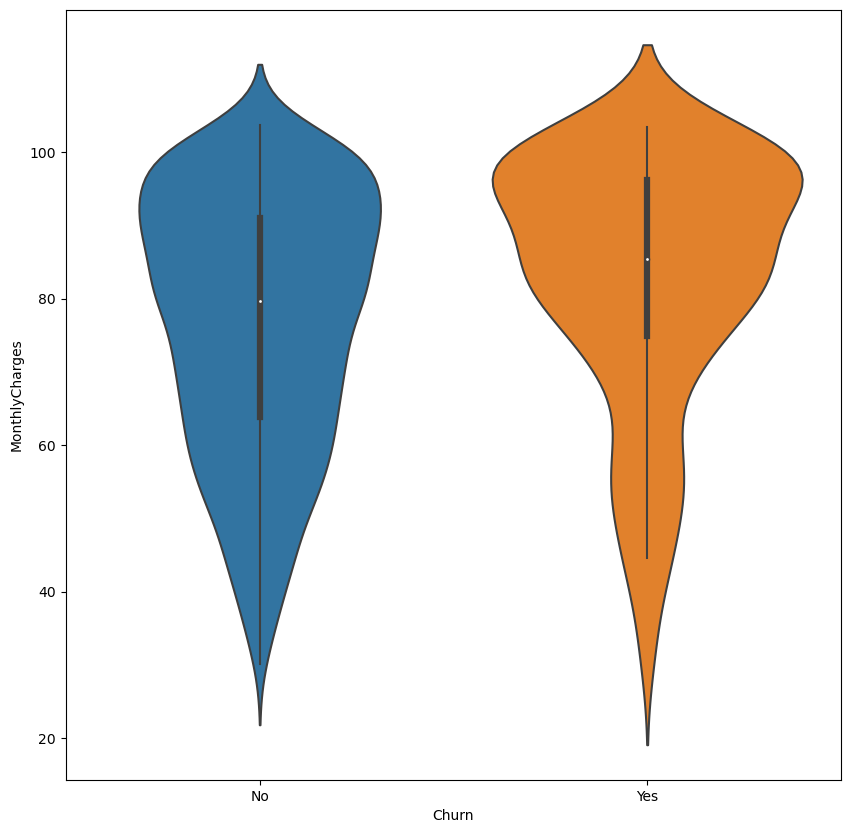

In [175]:
#bivariate plots based on two variables 

plt.figure(figsize=(10,10))
sns.violinplot(x="Churn" ,y="MonthlyCharges",data=df)

we can see that when total charge is too high many customers will churn

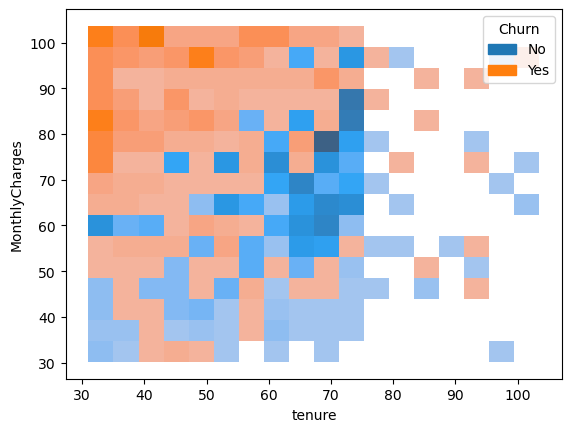

In [176]:
#advance graphs that based on more than two variables
plt.figure()
sns.histplot(x="tenure",y='MonthlyCharges',hue="Churn",data=df)
plt.show()


we can see here that customers who have shorter tenure, and have high monthly charges will most likely churn from the telecommunications company.

From The following graph we can note that
Customers who have been with the service for a shorter time, are on a month-to-month contract, and use fiber optic internet are at a higher risk of canceling the service.


C:\Users\nawaf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

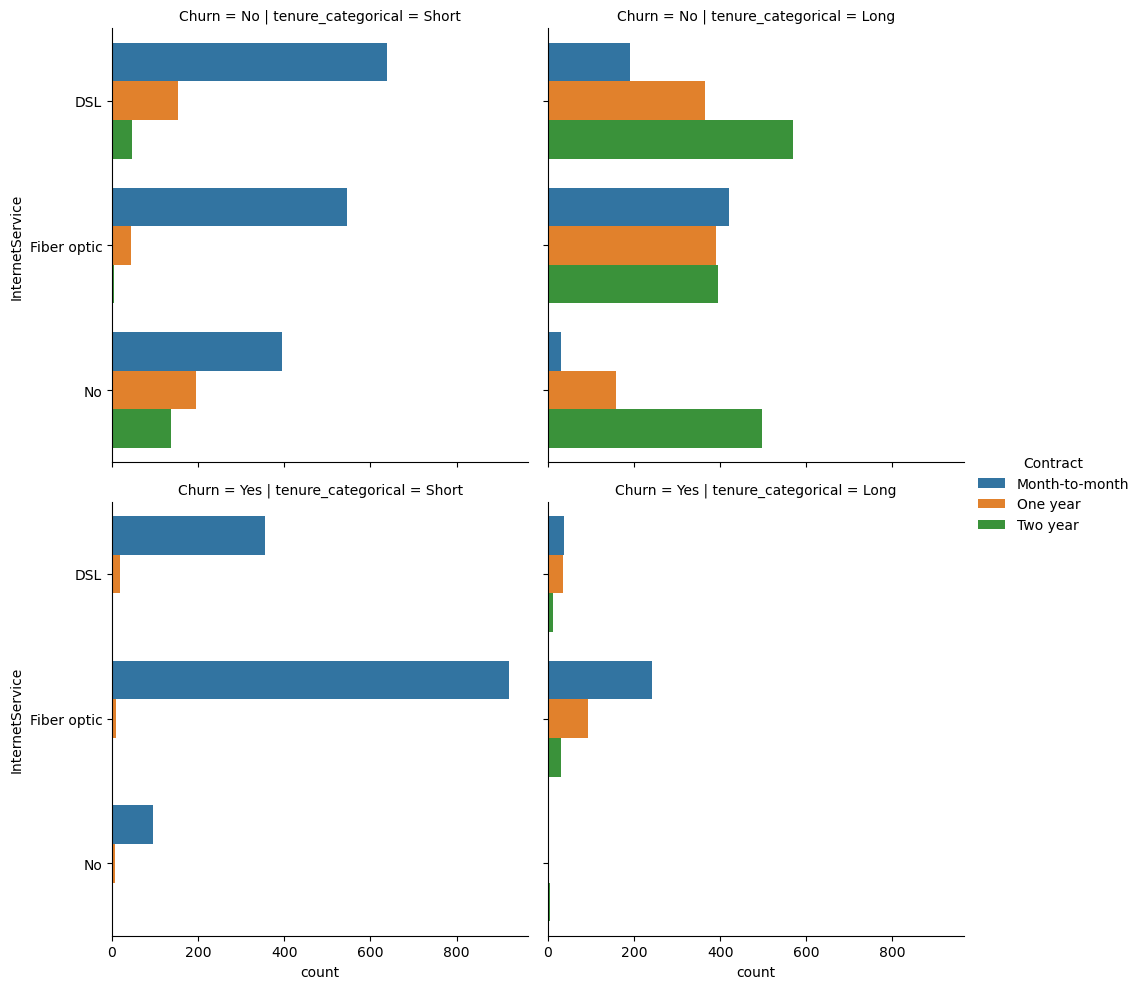

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv')
print('From The following graph we can note that\n'+
      'Customers who have been with the service for a shorter time, are on a month-to-month contract,' 
      ,'and use fiber optic internet are at a higher risk of canceling the service.')
ndf2=ndf[['tenure_categorical']].copy()
ndf2[['Contract', 'InternetService' ,'Churn']]=df[['Contract','InternetService','Churn']].copy()
ndf2['tenure_categorical']=ndf2['tenure_categorical'].apply(lambda x:'Long' if x==1 else 'Short')
plt.figure()
sns.catplot(kind="count",y='InternetService', hue='Contract', row='Churn', col="tenure_categorical", data=ndf2)
plt.show()

customers who have a shorter tenure, are on a month-to-month contract, and use fiber optic internet are more likely to cancel the service compared to other customer groups.

In [177]:
#Assess the relationship between variables
num_columns=df.select_dtypes(exclude="object").columns

corr=df[num_columns].corr()
display(corr)

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.045643       0.52512
MonthlyCharges  0.045643        1.000000       0.63314
TotalCharges    0.525120        0.633140       1.00000

In [178]:
corr.style.background_gradient(cmap='coolwarm')

Axes(0.125,0.11;0.62x0.77)


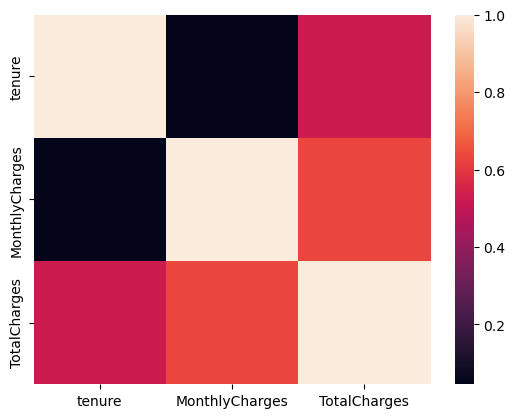

In [179]:
print(sns.heatmap(corr))

In [180]:
num_columns= df.select_dtypes(exclude="object").columns
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
for i in num_columns:
    if i != "pca1" and i != "pca2":
        scaler.fit(df[[i]]) 
        df[i]=scaler.transform(df[[i]]) 
display(df)

customerID  gender SeniorCitizen Partner Dependents    tenure  \
1     5575-GNVDE    Male            No      No         No -1.459911   
9     6388-TABGU    Male            No      No        Yes  0.565813   
10    9763-GRSKD    Male            No     Yes        Yes  2.899745   
18    4190-MFLUW  Female            No     Yes        Yes  2.826991   
23    3638-WEABW  Female            No     Yes         No  0.276424   
...          ...     ...           ...     ...        ...       ...   
7028  9281-CEDRU  Female            No     Yes         No  0.999897   
7031  3605-JISKB    Male           Yes     Yes         No  0.059382   
7033  9767-FFLEM    Male            No      No         No -1.170522   
7034  0639-TSIQW  Female            No      No         No  0.927550   
7039  2234-XADUH  Female            No     Yes        Yes  1.289286   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
1             Yes            No             DSL            Yes  ...   
9             Yes            No             DSL            Yes  ...   
10            Yes            No             DSL            Yes  ...   
18            Yes            No             DSL             No  ...   
23            Yes           Yes             DSL             No  ...   
...           ...           ...             ...            ...  ...   
7028          Yes            No             DSL             No  ...   
7031          Yes           Yes             DSL            Yes  ...   
7033          Yes            No     Fiber optic             No  ...   
7034          Yes           Yes     Fiber optic            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
1                 Yes          No          No              No        One year   
9                  No          No          No              No        One year   
10                 No          No          No              No  Month-to-month   
18                Yes         Yes          No              No  Month-to-month   
23                 No         Yes          No              No        Two year   
...               ...         ...         ...             ...             ...   
7028               No         Yes         Yes              No        Two year   
7031               No          No          No              No        One year   
7033               No          No          No              No  Month-to-month   
7034              Yes          No         Yes              No  Month-to-month   
7039              Yes          No         Yes             Yes        One year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
1                  No               Mailed check      -1.154890     -1.326346   
9                  No  Bank transfer (automatic)      -1.199643     -0.332030   
10                Yes               Mailed check      -1.546483     -2.136286   
18                 No    Credit card (automatic)      -1.252788     -2.173049   
23                Yes    Credit card (automatic)      -0.989861     -0.321362   
...               ...                        ...            ...           ...   
7028               No  Bank transfer (automatic)      -0.754904      0.189434   
7031               No    Credit card (automatic)      -0.984267     -0.438930   
7033              Yes    Credit card (automatic)      -0.452818     -0.868673   
7034              Yes    Credit card (automatic)       1.418441      1.781882   
7039              Yes    Credit card (automatic)       1.432427      2.078382   

      Churn  
1        No  
9        No  
10       No  
18      Yes  
23       No  
...     ...  
7028     No  
7031     No  
7033     No  
7034    Yes  
7039     No  

[1702 rows x 21 columns]

In [181]:
num_columns= df.select_dtypes(exclude="object").columns
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(df[num_columns])  

df['pca1'] = principalComponents[:,0] 
df['pca2'] = principalComponents[:,1] 
display(df)

customerID  gender SeniorCitizen Partner Dependents    tenure  \
1     5575-GNVDE    Male            No      No         No -1.459911   
9     6388-TABGU    Male            No      No        Yes  0.565813   
10    9763-GRSKD    Male            No     Yes        Yes  2.899745   
18    4190-MFLUW  Female            No     Yes        Yes  2.826991   
23    3638-WEABW  Female            No     Yes         No  0.276424   
...          ...     ...           ...     ...        ...       ...   
7028  9281-CEDRU  Female            No     Yes         No  0.999897   
7031  3605-JISKB    Male           Yes     Yes         No  0.059382   
7033  9767-FFLEM    Male            No      No         No -1.170522   
7034  0639-TSIQW  Female            No      No         No  0.927550   
7039  2234-XADUH  Female            No     Yes        Yes  1.289286   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
1             Yes            No             DSL            Yes  ...   
9             Yes            No             DSL            Yes  ...   
10            Yes            No             DSL            Yes  ...   
18            Yes            No             DSL             No  ...   
23            Yes           Yes             DSL             No  ...   
...           ...           ...             ...            ...  ...   
7028          Yes            No             DSL             No  ...   
7031          Yes           Yes             DSL            Yes  ...   
7033          Yes            No     Fiber optic             No  ...   
7034          Yes           Yes     Fiber optic            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
1             No              No        One year               No   
9             No              No        One year               No   
10            No              No  Month-to-month              Yes   
18            No              No  Month-to-month               No   
23            No              No        Two year              Yes   
...          ...             ...             ...              ...   
7028         Yes              No        Two year               No   
7031          No              No        One year               No   
7033          No              No  Month-to-month              Yes   
7034         Yes              No  Month-to-month              Yes   
7039         Yes             Yes        One year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges Churn      pca1  \
1                  Mailed check      -1.154890    -1.326346    No  2.232600   
9     Bank transfer (automatic)      -1.199643    -0.332030    No  0.626280   
10                 Mailed check      -1.546483    -2.136286    No  0.994309   
18      Credit card (automatic)      -1.252788    -2.173049   Yes  0.892874   
23      Credit card (automatic)      -0.989861    -0.321362    No  0.637942   
...                         ...            ...          ...   ...       ...   
7028  Bank transfer (automatic)      -0.754904     0.189434    No -0.181652   
7031    Credit card (automatic)      -0.984267    -0.438930    No  0.817305   
7033    Credit card (automatic)      -0.452818    -0.868673    No  1.395274   
7034    Credit card (automatic)       1.418441     1.781882   Yes -2.448167   
7039    Credit card (automatic)       1.432427     2.078382    No -2.829986   

          pca2  
1    -0.373754  
9     1.204401  
10    3.241479  
18    2.998481  
23    0.847628  
...        ...  
7028  1.249567  
7031  0.678144  
7033 -0.603508  
7034 -0.209008  
7039  0.057558  

[1702 rows x 23 columns]

In [182]:
for ind,var in enumerate(pca.explained_variance_ratio_): 
 print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')

The variance captured by pca 1 is:  61.51%
The variance captured by pca 2 is:  31.84%


In [183]:
pca_1_coefficients=np.round(pca.components_[0],4) 
zipList=list(zip(num_columns,pca_1_coefficients)) 
ndf=pd.DataFrame.from_records(zipList,columns=['field','coeff']) 
display(ndf.sort_values(by=['coeff'], ascending=False))

field   coeff
0          tenure -0.4628
1  MonthlyCharges -0.5473
2    TotalCharges -0.6974

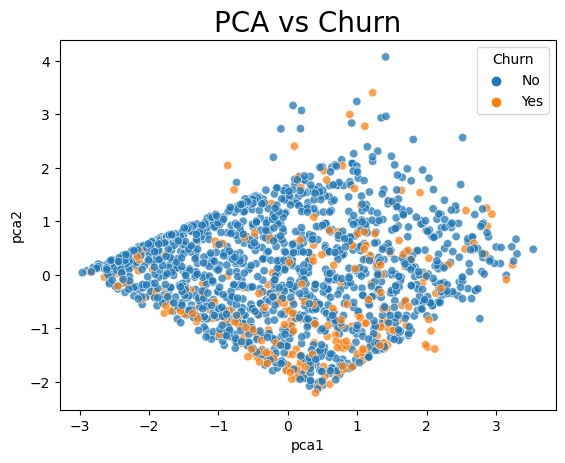

In [184]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure() 
sns.scatterplot(x='pca1',y='pca2', 
alpha=0.75, hue="Churn",
data=df) 
plt.title('PCA vs Churn', fontsize = 20) 
plt.show() 


PCA show good separation with some overlap

Summarise findinds
We found that customers who have shorter tenure and have higher monthly charges are more likely to churn. and we found that tenure and total charges have a positive and high correlation, which makes sense, customers  are on a month-to-month contract, and use fiber optic internet are more likely to cancel the service compared to other customer groups.

# Phase 4
Model Building

Why classification?

As focused on the objective of the project, we have to classify
the data into different categories of the Churn (
Yes, No) . So classification model will
be best to address the objective.

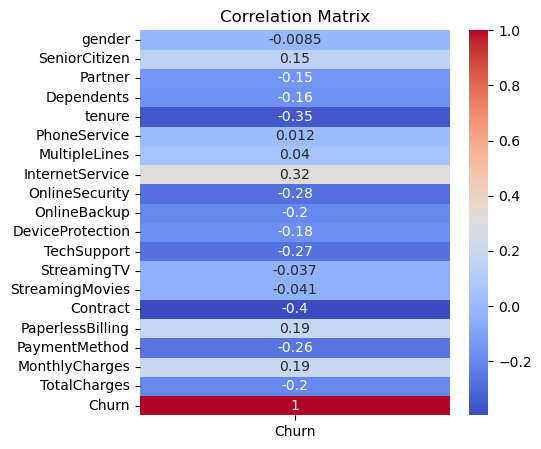

Churn
Churn             1.000000
Contract          0.396150
tenure            0.354049
InternetService   0.316350
OnlineSecurity    0.280508
TechSupport       0.274112
PaymentMethod     0.262918
TotalCharges      0.199484
OnlineBackup      0.195758
MonthlyCharges    0.192858
PaperlessBilling  0.191454
DeviceProtection  0.176806
Dependents        0.163128
SeniorCitizen     0.150541
Partner           0.149982
StreamingMovies   0.040525
MultipleLines     0.040207
StreamingTV       0.036698
PhoneService      0.011691
gender            0.008545

In [185]:
## Revisiting the Correlation Matrix
df = pd.read_csv('dataset.csv')

rows_with_empty_Total=df.loc[df['TotalCharges']==' ',:].index
df=df.drop(rows_with_empty_Total,axis=0)
df['TotalCharges']=df['TotalCharges'].apply(lambda x : float(x))

churn_map = {'Yes': 1, 'No': 0}
binary_map = {'Yes': 1, 'No': 0}
gender_map = {'Male': 1, 'Female': 0} 
internet_service_map = {'DSL': 1, 'Fiber optic': 2, 'No': 0}
df['gender']=df['gender'].map(gender_map)
df['Churn'] = df['Churn'].map(churn_map)
df['Partner'] = df['Partner'].map(binary_map)
df['Dependents'] = df['Dependents'].map(binary_map)
df['PhoneService'] = df['PhoneService'].map(binary_map)
df['MultipleLines'] = df['MultipleLines'].map(binary_map)
df['OnlineSecurity'] = df['OnlineSecurity'].map(binary_map)
df['OnlineBackup'] = df['OnlineBackup'].map(binary_map)
df['DeviceProtection'] = df['DeviceProtection'].map(binary_map)
df['TechSupport'] = df['TechSupport'].map(binary_map)
df['StreamingTV'] = df['StreamingTV'].map(binary_map)
df['StreamingMovies'] = df['StreamingMovies'].map(binary_map)
df['Contract'] = df['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
df['PaperlessBilling'] = df['PaperlessBilling'].map(binary_map)
df['PaymentMethod'] = df['PaymentMethod'].map({
    'Electronic check': 1,
    'Mailed check': 2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4})
df['InternetService'] = df['InternetService'].map(internet_service_map)
df = df.drop(columns=['customerID'],axis=1)


correlation_matrix = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix[['Churn']], annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
ordering=correlation_matrix[['Churn']].apply(lambda x: abs(x)).sort_values(by=['Churn'], ascending=False)
display(ordering)

### Performance of Different Models

When using all categorical columns, we obtained the following accuracies:

- **Decision Tree:** Accuracy = 0.7281760113555713
- **Random Forest:** Accuracy = 0.7792760823278921
- **Naive Bayes for Categorical Data:** Accuracy = 0.7182398864442867

We observed that the `tenure` feature also has a high correlation with the output. Therefore, we considered encoding it numerically. Initially, we encoded `tenure` into 4 categories. We then reduced the number of categories until we found that the best accuracy was achieved when the column was subdivided into binary categories, with the boundary at the second quartile (i.e., the median).

The accuracies for this binary encoding were:

- **Decision Tree:** Accuracy = 0.7480482611781405
- **Random Forest:** Accuracy = 0.7856635911994322
- **Naive Bayes for Categorical Data:** Accuracy = 0.7295954577714692

Finally, we aimed to reduce overfitting by selecting the top three columns with the highest correlation to the output. In this final step, we observed consistent performance across all methods, indicating this was the optimal approach.

- **Decision Tree:** Accuracy = 0.8026969481902059
- **Random Forest:** Accuracy = 0.8026969481902059
- **Naive Bayes for Categorical Data:** Accuracy = 0.8026969481902059


In [186]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import CategoricalNB
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')

catcolumns=df.select_dtypes(include='object').drop(['customerID','TotalCharges'],axis=1).columns

ndf=df[catcolumns].copy()

# Mapping to numeric values

churn_map = {'Yes': 1, 'No': 0}
binary_map = {'Yes': 1, 'No': 0}
gender_map = {'Male': 1, 'Female': 0}
Semi_binary_map={'Yes': 1, 'No': 0,'No internet service':2}
MultipleLines_map={'Yes': 1, 'No': 0,'No phone service':2}
internet_service_map = {'DSL': 1, 'Fiber optic': 2, 'No': 0}
# Apply mappings to columns
ndf['gender']=ndf['gender'].map(gender_map)
ndf['Churn'] = ndf['Churn'].map(churn_map)
ndf['Partner'] = ndf['Partner'].map(binary_map)
ndf['Dependents'] = ndf['Dependents'].map(binary_map)
ndf['PhoneService'] = ndf['PhoneService'].map(binary_map)
ndf['MultipleLines'] = ndf['MultipleLines'].map(MultipleLines_map)
ndf['OnlineSecurity'] = ndf['OnlineSecurity'].map(Semi_binary_map)
ndf['OnlineBackup'] = ndf['OnlineBackup'].map(Semi_binary_map)
ndf['DeviceProtection'] = ndf['DeviceProtection'].map(Semi_binary_map)
ndf['TechSupport'] = ndf['TechSupport'].map(Semi_binary_map)
ndf['StreamingTV'] = ndf['StreamingTV'].map(Semi_binary_map)
ndf['StreamingMovies'] = ndf['StreamingMovies'].map(Semi_binary_map)
ndf['Contract'] = ndf['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
ndf['PaperlessBilling'] = ndf['PaperlessBilling'].map(binary_map)
ndf['PaymentMethod'] = ndf['PaymentMethod'].map({'Electronic check': 1,'Mailed check': 2,'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4})
ndf['InternetService'] = ndf['InternetService'].map(internet_service_map)


def num_to_cat(x): # we have tried encodeing to 2,3 and 4 categories. The best are 2,4 and 3 respectively.
    if x <= 29:
        return 0  # 'Short'
    else:  # x >= 30
        return 1  # 'Long'
    
    
ndf['tenure_categorical']=df['tenure'].apply(num_to_cat)


# def num_to_cat_2(x):
#     if x <= 1397.48:
#         return 0  # 'Low'
#     else:
#         return 1  # 'High'

# ndf['TotalCharges_categorical']=df['TotalCharges'].apply(num_to_cat_2)
# # Compute the correlation matrix
# correlation_matrix = df.corr()
# # Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(5,5))
# sns.heatmap(correlation_matrix[['Churn']], annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()
# arrr=correlation_matrix[['Churn']].apply(lambda x: abs(x)).sort_values(by=['Churn'], ascending=False)
# display(arrr)


# splitting the data to train and test sections
X = ndf.drop('Churn', axis=1)
X=X.loc[:,['Contract','tenure_categorical','InternetService']] ## selecting the best columns to overcome overfitting.
y = ndf['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First, Decision Tree Classifier.
dtClf = tree.DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='best')
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

print()
print("Decision Tree: ")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )


## second, Random Forest Classifier.
rf = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=42)
rf = rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)

print()
print("Random Forest: ")
print("Accuracy:=",  accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, rf_y_pred) )

## third, Naive Bayes Classifier for (Categorical)
 
NBClf = CategoricalNB(alpha=1.0e-10, class_prior=None, fit_prior=True)  
NBClf.fit(X_train,y_train)
NB_y_pred = NBClf.predict(X_test)

print()
print("NB for Categorical Data: ")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )


Decision Tree: 
Accuracy:= 0.8026969481902059
Confusion Matrix:= 
 [[933 103]
 [175 198]]

Random Forest: 
Accuracy:= 0.8026969481902059
Confusion Matrix:= 
 [[933 103]
 [175 198]]

NB for Categorical Data: 
Accuracy:= 0.8026969481902059
Confusion Matrix:= 
 [[933 103]
 [175 198]]


In [187]:
# Since all models are equivalent, any confusion matrix will suffice.

Confusion_Matrix = confusion_matrix(y_test, NB_y_pred)
print(Confusion_Matrix)
# Extract TP, FP, FN, TN
TP = Confusion_Matrix[1, 1]  # True Positives
TN = Confusion_Matrix[0, 0]  # True Negatives
FP = Confusion_Matrix[0, 1]  # False Positives
FN = Confusion_Matrix[1, 0]  # False Negatives

# Calculate some measures
Accuracy = (TP + TN) / (TP + FP + FN + TN)
Sensitivity = TP / (TP + FN)
Specificity = TN / (FP + TN)
Precision = TP / (TP + FP)
Balanced_Accuracy = (Sensitivity + Specificity) / 2

# Print results
print(f"Accuracy: {Accuracy*100:.2f}")
print(f"Sensitivity: {Sensitivity*100:.2f}")
print(f"Specificity: {Specificity*100:.2f}")
print(f"Precision: {Precision*100:.2f}")
print(f"Balanced Accuracy: {Balanced_Accuracy*100:.2f}")
print()
print('''High specificity means the model is very accurate at predicting customers who are still with the service''')


[[933 103]
 [175 198]]
Accuracy: 80.27
Sensitivity: 53.08
Specificity: 90.06
Precision: 65.78
Balanced Accuracy: 71.57

High specificity means the model is very accurate at predicting customers who are still with the service


In [188]:
#plotting the tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize =(15,15),dpi=1000)
tree.plot_tree(dtClf,feature_names=['Contract','tenure_categorical','InternetService'],class_names=['No','Yes'],
               filled=True,rounded=True,max_depth=15)
plt.show()

In [189]:
print('The rules of the tree : \n\n')
print(tree.export_text(dtClf,feature_names=['Contract','tenure_categorical','InternetService']))

The rules of the tree : 


|--- Contract <= 1.50
|   |--- InternetService <= 1.50
|   |   |--- InternetService <= 0.50
|   |   |   |--- tenure_categorical <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- tenure_categorical >  0.50
|   |   |   |   |--- class: 0
|   |   |--- InternetService >  0.50
|   |   |   |--- tenure_categorical <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- tenure_categorical >  0.50
|   |   |   |   |--- class: 0
|   |--- InternetService >  1.50
|   |   |--- tenure_categorical <= 0.50
|   |   |   |--- class: 1
|   |   |--- tenure_categorical >  0.50
|   |   |   |--- class: 0
|--- Contract >  1.50
|   |--- InternetService <= 1.50
|   |   |--- Contract <= 2.50
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- tenure_categorical <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- tenure_categorical >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- InternetService >  0.50
|   |   |   |   |--- tenure_categorical <= 0.50
|   

# Phase 5

Communicate results

# Summary and recommendations

### Summary
In this analysis, a messy dataset was cleaned and explored using visualizations. Churn classification using various models revealed the Decision Tree Classifier as
the most accurate at 80.3%, a significant stride in effective classification.

### Recommendations:
1. To improve the generality  in the classification process,
it is suggested to utilize a larger and balanced dataset specifically
focused on Churn cases.
2. To keep customers subscribed, companies should lower monthly charges and especially offer deals to customers with shorter tenures, on month-to-month contracts, and using fiber optic internet to build loyalty, which will help keep subscriptions longer. It's important to focus on these groups to reduce cancellations.

# Phase 6

Operationalize

# Methodology

1- Address an objective for the project that can be solved.

2- Display the data and evaluate it.

3- Clean and organize the data.

4- Visualize the data and find relationships.

5- Determine whether data points can be clustered, classified or used regression.

6- After choosing classification, we need to decide the best classification models.

7- Evaluate all the classification and decide which solves our objective with highest accuracy.

# Issues faced

1- The dataset was limited in size.

2- Not all of the data in the models underwent scaling like ID column.

3- No outliers or missing values.

4- Relatively low correlation between the output and the inputs.

# Thanks!!